# NLP for the Analysis of Food Addictives Impact on Health

 This section I Natural Language Processing (NLP) to analyse
 public and scientific discourse on food additives.  It does
 sentiment analysis and entity recognition on scraped articles and
 PubMed abstracts.  The purpose is to identify the common
 additives,  associated health concerns, and overall sentiment
 trends in unstructured text sources. These insights expand on the
 survey-based data by examining how additives are perceived and
 discussed across many disciplines

In [ ]:
#install necessary library
!pip install requests beautifulsoup4 newspaper3k

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 88.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 11.1 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13540 sha256=dcee4b7fcaca9dac9a64b6b27ba273f739b2c48d4a316cf068360062bc0729c4
  Stored in directory: /root/.cache/pip/wheels/fc/ab/f8/cce3a9ae6d828bd346be695f7ff54612cd22b7cbd7208d68f3
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3341 sha256=7764e4a2b144b4ebcd8c4c2238813a73c8eedb20ae60beecf695bde5e26dfc84
  Stored in directory: /root/.cache/pip/wheels/80/d5/72/9cd9eccc819636436c6a6e59c22a0fb1e

In [ ]:
#install another necessary library
!pip install lxml_html_clean

## Analyzing Particular Articles on Food Addictives Impact on Health

In [ ]:
#import necessary libraries
from newspaper import Article
import logging
import pandas as pd

#disable newspaper warnings
logging.getLogger().setLevel(logging.CRITICAL)

#list of URLs to scrape
urls = [
    "https://erc.europa.eu/projects-statistics/science-stories/health-impact-food-additives",
    "https://www.acko.com/health-insurance/impact-of-food-additives-and-preservatives/#what-are-food-additives-and-preservatives",
    "https://www.health.harvard.edu/blog/common-food-additives-and-chemicals-harmful-to-children-2018072414326"
]

def extract_main_content(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return {
            'url': url,
            'title': article.title,
            'text': article.text
        }
    except Exception as e:
        return {'url': url, 'title': 'ERROR', 'text': str(e)}

#extract the article texts
data = [extract_main_content(url) for url in urls]
df = pd.DataFrame(data)

In [ ]:
df.head()

,url,title,text
0,https://erc.europa.eu/projects-statistics/scie...,The health impact of food additives,Nitrates or titanium dioxide may make you thin...
1,https://www.acko.com/health-insurance/impact-o...,The impact of food additives and preservatives...,The impact of food additives and preservatives...
2,https://www.health.harvard.edu/blog/common-foo...,Common food additives and chemicals harmful to...,"Claire McCarthy, MD, is a primary care pediatr..."


### Various Analysis on the Extracted Texts

**Sentiment Analysis**

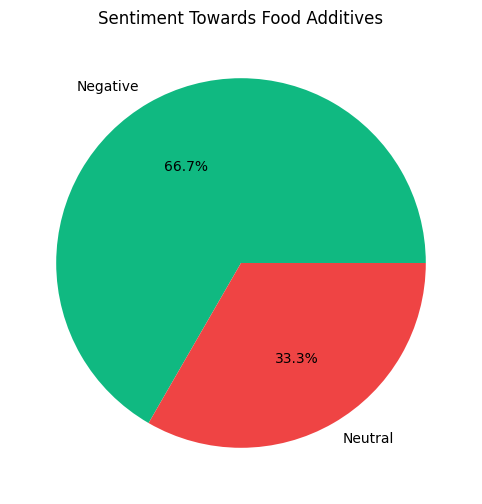

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
#analyzing sentiment
def analyze_sentiment(text):
    positive_words = ['beneficial', 'safe', 'essential', 'improve', 'enhance']
    negative_words = ['harmful', 'risk', 'toxic', 'negative', 'cancer', 'allergic']
    score = 0
    text = text.lower()
    for word in positive_words:
        if word in text:
            score += 1
    for word in negative_words:
        if word in text:
            score -= 1
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    return 'Neutral'

df['sentiment'] = df['text'].apply(analyze_sentiment)
# Visualizing sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#10b981', '#ef4444', '#eab308'])
plt.title('Sentiment Towards Food Additives')
plt.ylabel('')
plt.show()

**Counts of Health Risk Occurences**

In [ ]:
all_text = ' '.join([d['text'] for d in data])
clean_text = re.sub(r'\s+', ' ', all_text.lower())
from collections import Counter
health_terms = [
    "diabetes", "cancer", "obesity", "inflammation", "gut microbiota", "metabolic disorder",
    "cardiovascular disease", "ADHD", "immune response", "toxicity", "hormone disruption",
    "allergy", "asthma", "neurodevelopment", "fertility", "insulin resistance"
]

#count term frequencies
health_counter = Counter()
for term in health_terms:
    health_counter[term] = clean_text.count(term.lower())

#convert to DataFrame
health_df = pd.DataFrame(health_counter.items(), columns=['Health_Risk', 'Mentions'])
health_df = health_df.sort_values(by='Mentions', ascending=False).head(10)

In [ ]:
health_df

,Health_Risk,Mentions
1,cancer,10
3,inflammation,4
6,cardiovascular disease,2
9,toxicity,2
12,asthma,2
4,gut microbiota,1
2,obesity,1
0,diabetes,1
15,insulin resistance,1
8,immune response,1


**Plotting the WordCloud of Most appeared words**

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#using NLTK stopwords
nltk_stopwords = set(stopwords.words('english'))
#adding domain-specific words to exclude
custom_stopwords = nltk_stopwords.union({
    'food', 'additives', 'preservatives', 'health', 'risks', 'study', 'research', 'studies'
})

#generating word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    min_font_size=10
).generate(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


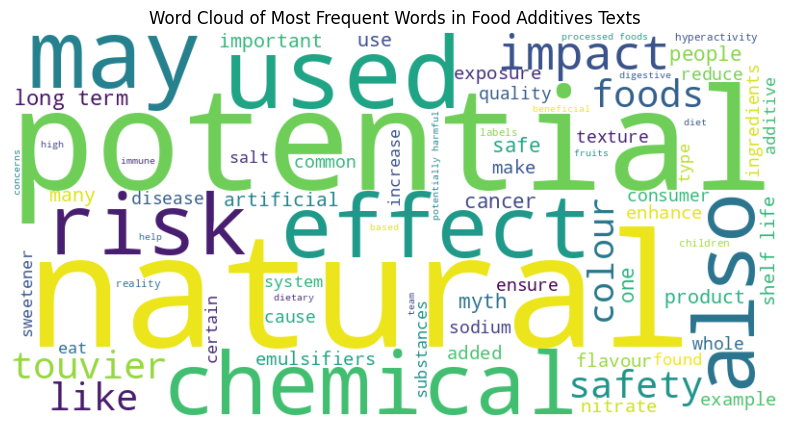

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Food Additives Texts')
plt.show()

**Performing advanced Sentiment Analysis with Polarity and Subjectivity**

In [ ]:
from textblob import TextBlob
#performing sentiment analysis with TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

#applying sentiment analysis to each text
df['polarity'], df['subjectivity'] = zip(*df['text'].apply(analyze_sentiment))

#aggregating sentiment results
avg_polarity = df['polarity'].mean()
avg_subjectivity = df['subjectivity'].mean()


In [ ]:
print(f"Average Polarity: {avg_polarity:.2f}")
print(f"Average Subjectivity: {avg_subjectivity:.2f}")

Average Polarity: 0.11
Average Subjectivity: 0.43


The average polarity of 0.11 indicates that the articles generally express a slightly positive tone, though very close to neutral. This suggests that while concerns about food additives are discussed, the language used is balanced rather than alarmist or overly negative.

The average subjectivity of 0.43 shows that the content is moderately objective. The articles blend factual information (e.g., health effects, scientific studies) with some subjective commentary or interpretation, which is common in health journalism and explanatory research.

Together, the results reflect informative but cautiously critical discussions on the health impact of food additives.

**Analysing the inter-relationship between the health risks and addictives**

In [ ]:
import spacy
import logging
import re
from collections import defaultdict

#load spaCy
logging.getLogger().setLevel(logging.CRITICAL)
nlp = spacy.load("en_core_web_sm")
#additive and Health Keyword Lists
additives = [
    "carrageenan", "tripotassium phosphate", "guar gum", "gum arabic", "xanthan gum",
    "sodium citrate", "lecithin", "E407", "E340", "E412", "E414", "E415", "E331", "E472e", "E471",
    "BHA", "BHT", "TBHQ", "sulfites", "phthalates", "nitrates", "nitrites", "tartrazine", "preservatives"
]

health_terms = [
    "diabetes", "cancer", "obesity", "inflammation", "gut microbiota", "metabolic disorder",
    "cardiovascular disease", "ADHD", "immune response", "toxicity", "hormone disruption", "allergy"
]

#relation Extraction via Co-Occurrence in Sentences
def extract_relations(text):
    doc = nlp(text)
    relations = []
    for sent in doc.sents:
        sent_lower = sent.text.lower()
        found_additives = [a for a in additives if a in sent_lower]
        found_health = [h for h in health_terms if h in sent_lower]
        for a in found_additives:
            for h in found_health:
                relations.append((a, h, sent.text.strip()))
    return relations

df['relations'] = df['text'].apply(extract_relations)

#collate and Display Relationships
relation_list = sum(df['relations'], [])
rel_df = pd.DataFrame(relation_list, columns=["Additive", "Health_Issue", "Context_Sentence"])
summary = rel_df.groupby(['Additive', 'Health_Issue']).size().reset_index(name='Mentions')

#output
print("\n🔗 Most Mentioned Additive–Health Impact Pairs:\n")
print(summary.sort_values("Mentions", ascending=False).head(10))



🔗 Most Mentioned Additive–Health Impact Pairs:

        Additive Health_Issue  Mentions
0       nitrates       cancer         3
2  preservatives       cancer         3
1       nitrites       cancer         2


In [ ]:
print("\n🧾 Sample Contexts:")
for _, row in rel_df.head(5).iterrows():
    print(f"\n• {row['Additive']} ➜ {row['Health_Issue']}")
    print(f"  ↳ “{row['Context_Sentence']}”")


🧾 Sample Contexts:

• nitrates ➜ cancer
  ↳ “They have also observed a link between exposure to nitrates and nitrites in processed meat and an increase risk of cancer, in particular breast and prostate cancers.”

• nitrites ➜ cancer
  ↳ “They have also observed a link between exposure to nitrates and nitrites in processed meat and an increase risk of cancer, in particular breast and prostate cancers.”

• preservatives ➜ cancer
  ↳ “Some preservatives, such as sodium nitrate and sodium nitrite, may also increase the risk of cancer and other illnesses.”

• nitrates ➜ cancer
  ↳ “Cancer Risks

Nitrates and Nitrites: Found in processed meats like bacon and sausages, these preservatives can convert into nitrosamines in the body, compounds linked to an increased risk of certain cancers, particularly colorectal cancer.”

• nitrites ➜ cancer
  ↳ “Cancer Risks

Nitrates and Nitrites: Found in processed meats like bacon and sausages, these preservatives can convert into nitrosamines in the body

The above analysis shows the often mentioned addictives and the health impact. Further analysis on the contents show what exactly was said about this addictive and the health impact

**Top keywords**

In [ ]:
#check the top keywords from these articles scraped
from sklearn.feature_extraction.text import TfidfVectorizer
print("Top Keywords:")
stop_words = set(stopwords.words('english'))
text_clean = re.sub(r'\W+', ' ', clean_text.lower())
vectorizer = TfidfVectorizer(stop_words='english', max_features=15)
X = vectorizer.fit_transform([text_clean])
print(vectorizer.get_feature_names_out())

Top Keywords:
['additives' 'chemicals' 'food' 'foods' 'health' 'life' 'long' 'natural'
 'potential' 'preservatives' 'processed' 'risk' 'risks' 'term' 'used']


## Extracting Relative Articles from pymed

In [ ]:
!pip install pymed

In [ ]:
#extract articles with food additives health impact as query word
from pymed import PubMed
pubmed = PubMed(tool="MyNLPApp")
results = pubmed.query("food additives health impact", max_results=1000)
data = [{"Title": article.title, "Abstract": article.abstract} for article in results if article.abstract]

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
nlp = spacy.load("en_core_web_sm")

#function to clean text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#function to perform sentiment analysis
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    return scores['compound']

#function to extract keywords using TF-IDF
def get_keywords(texts):
    vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    return vectorizer.get_feature_names_out()

#function to extract entities (additives, health impacts)
def extract_entities(text):
    doc = nlp(text)
    additives = []
    health_impacts = []
    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT"]:
            additives.append(ent.text)
        if ent.label_ in ["DISEASE", "GPE"]:
            health_impacts.append(ent.text)
    #custom keyword-based fallback
    additive_keywords = ["Polysorbate 80", "sodium benzoate", "aspartame", "sucralose", "propylparaben",
                           "carrageenan", "tripotassium phosphate", "guar gum", "gum arabic", "xanthan gum",
                        "sodium citrate", "lecithin", "E407", "E340", "E412", "E414", "E415", "E331", "E472e", "E471",
                      "BHA", "BHT", "TBHQ", "sulfites", "phthalates", "nitrates", "nitrites", "tartrazine", "preservatives"]
    health_keywords = ["MASLD", "insulin resistance", "obesity", "diabetes", "senescence", "inflammation", "mitochondrial dysfunction", "puberty"]
    for kw in additive_keywords:
        if kw.lower() in text.lower():
            additives.append(kw)
    for kw in health_keywords:
        if kw.lower() in text.lower():
            health_impacts.append(kw)
    return list(set(additives)), list(set(health_impacts))

#process data
results = []
abstracts = [clean_text(item["Abstract"]) for item in data]
keywords = get_keywords(abstracts)

for item in data:
    abstract = clean_text(item["Abstract"])
    sentiment = get_sentiment(abstract)
    additives, health_impacts = extract_entities(abstract)
    results.append({
        "Title": item["Title"],
        "Abstract": abstract,
        "Additives": ";".join(additives),
        "Health_Impacts": ";".join(health_impacts),
        "Sentiment_Score": sentiment,
        "Top_Keywords": ";".join(keywords)
    })

#save to CSV
df = pd.DataFrame(results)
df.to_csv("pubmed_food_additives_nlp.csv", index=False)
print("Dataset saved to 'pubmed_food_additives_nlp.csv'")
print(df[["Title", "Sentiment_Score", "Additives", "Health_Impacts"]])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Dataset saved to 'pubmed_food_additives_nlp.csv'
                                                 Title  Sentiment_Score  \
0    Dose-response study of a fenugreek-based antib...           0.8779   
1    Red Beet Process Waste: A Sustainable Glucose ...          -0.6808   
2    From Bugs to Benefits: Edible Insects as Excep...           0.7964   
3    Assessment of tire-derived additives and their...           0.4939   
4    Xiasangju alleviates hepatic insulin resistanc...           0.8885   
..                                                 ...              ...   
979  The Impact of a Lifestyle Intervention on Post...           0.9429   
980  Application of chitosan and other biopolymers ...           0.8202   
981  The effect of pre-exercise protein intake on s...           0.2732   
982  Patient reported outcome measures and cardiova...           0.7351   
983  The role of diabetes in metastatic melanoma pa...           0.3839   

                                             Addit

In [ ]:
df

,Title,Abstract,Additives,Health_Impacts,Sentiment_Score,Top_Keywords
0,Dose-response study of a fenugreek-based antib...,Combating antimicrobial resistance is one of t...,Group,,0.8779,effects;food;glucose;health;high;impact;levels...
1,Red Beet Process Waste: A Sustainable Glucose ...,Red beet (RB) is a key component in the natura...,Practical Application;Custom Mixture Design;RB...,,-0.6808,effects;food;glucose;health;high;impact;levels...
2,From Bugs to Benefits: Edible Insects as Excep...,Eating insects may be healthier and more susta...,PubMed;ScienceDirect,,0.7964,effects;food;glucose;health;high;impact;levels...
3,Assessment of tire-derived additives and their...,"Tire wear particles, released at an estimated ...",DCU;bell pepper;DPG;UPLC-MS/MS;BTH;LOQ;LOD,,0.4939,effects;food;glucose;health;high;impact;levels...
4,Xiasangju alleviates hepatic insulin resistanc...,"Type 2 diabetes mellitus (T2DM), one of the pr...",IR;XSJ;AMPK;SPR-LC-MS;db/db mice;IR-HepG2;SPR)...,insulin resistance;diabetes,0.8885,effects;food;glucose;health;high;impact;levels...
...,...,...,...,...,...,...
979,The Impact of a Lifestyle Intervention on Post...,Women with abnormal glucose tolerance during p...,HOMA-IR;the Lifestyle Intervention;the Health ...,insulin resistance;diabetes,0.9429,effects;food;glucose;health;high;impact;levels...
980,Application of chitosan and other biopolymers ...,Deterioration of perishable foods due to funga...,preservatives;EO,,0.8202,effects;food;glucose;health;high;impact;levels...
981,The effect of pre-exercise protein intake on s...,Pre-exercise protein consumption does not seem...,Fat,,0.2732,effects;food;glucose;health;high;impact;levels...
982,Patient reported outcome measures and cardiova...,Intravenous iron is commonly used to treat iro...,NT-proBNP;serum;ND-CKD,,0.7351,effects;food;glucose;health;high;impact;levels...


In [ ]:
data = pd.read_csv("pubmed_food_additives_nlp.csv")

**Preprocessing the Extracted Texts**

In [ ]:
data = data.dropna(subset=['Title', 'Abstract']).copy()

#converting Sentiment_Score to numeric, handling any invalid entries
data['Sentiment_Score'] = pd.to_numeric(data['Sentiment_Score'], errors='coerce')

#cleaning text columns by removing special characters and extra spaces
def clean_text(text):
    if pd.isna(text):
        return ''
    text = re.sub(r'[^\w\s]', ' ', str(text))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['Title'] = data['Title'].apply(clean_text)
data['Abstract'] = data['Abstract'].apply(clean_text)

In [ ]:
#handling missing additives and health impacts by filling with 'None'
data['Additives'] = data['Additives'].fillna('None')
data['Health_Impacts'] = data['Health_Impacts'].fillna('None')

#splitting and cleaning top keywords
data['Top_Keywords'] = data['Top_Keywords'].apply(lambda x: [kw.strip() for kw in x.split(';')] if pd.notna(x) else [])


**Plotting the WordCloud for the most appeared words**

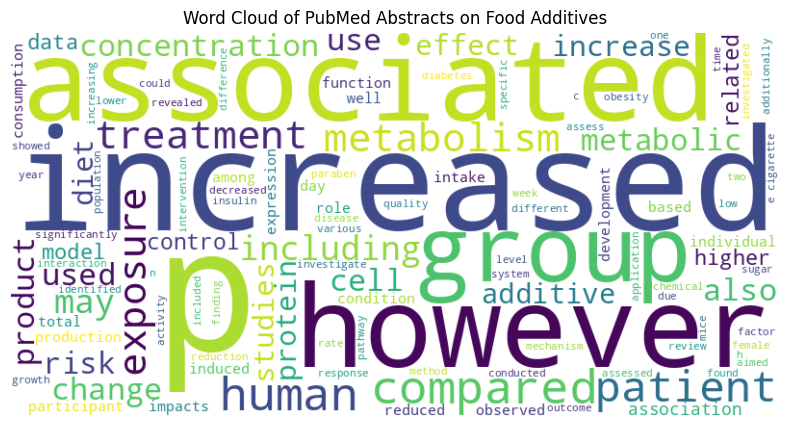

In [ ]:
#combining all abstracts for word cloud
all_abstracts = ' '.join(data['Abstract'])

#preprocessing text for word cloud
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

cleaned_abstracts = preprocess_text(all_abstracts)
nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = nltk_stopwords.union({
    'study', 'research', 'effects', 'food', 'glucose', 'health', 'high', 'impact',
    'levels', 'potential', 'using', 'results', 'analysis', 'significant'
})

#generating word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    min_font_size=10
).generate(cleaned_abstracts)

#plotting word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of PubMed Abstracts on Food Additives')
plt.show()

**The most appeared addictives from these articles**

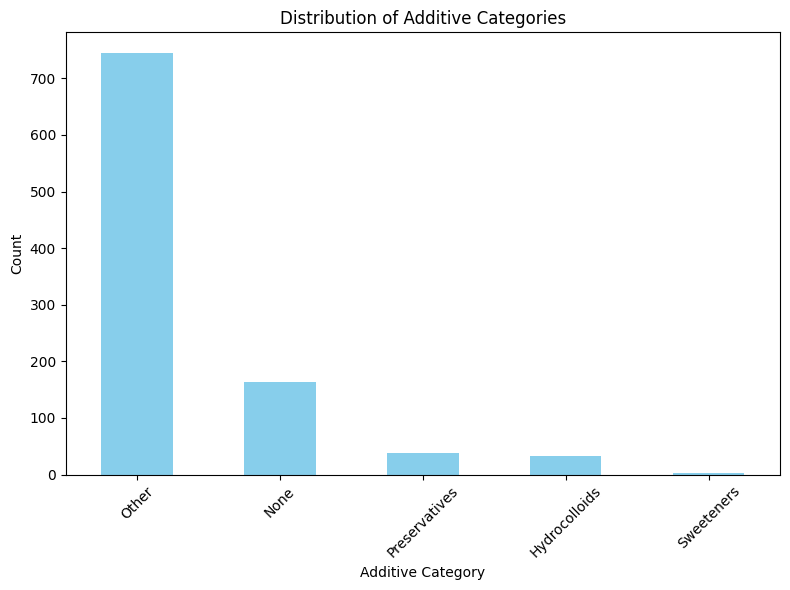

In [ ]:
#categorizing Additives
def categorize_additive(additive):
    additive = additive.lower()
    if additive == 'none':
        return 'None'
    elif any(x in additive for x in ['glucose', 'fructose', 'sugar', 'sweetener']):
        return 'Sweeteners'
    elif any(x in additive for x in ['preservative', 'paraben', 'sodium']):
        return 'Preservatives'
    elif any(x in additive for x in ['pectin', 'gum', 'hydrocolloid']):
        return 'Hydrocolloids'
    else:
        return 'Other'

data['Additive_Category'] = data['Additives'].apply(categorize_additive)
additive_counts = data['Additive_Category'].value_counts()

plt.figure(figsize=(8, 6))
additive_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Additive Categories')
plt.xlabel('Additive Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The distribution of additive categories in the PubMed dataset on food additives reveals a significant variation. The "Other" category dominates, accounting for the majority of entries with a count exceeding 600, indicating a broad range of additives not specifically classified under the defined categories. The "None" category follows, with a count of approximately 150, representing studies where no specific additives were identified or emphasized. In contrast, the "Preservatives" category has a moderate presence with a count around 50, reflecting a notable but lesser focus compared to "Other." The "Hydrocolloids" category shows a similar distribution, also around 50, suggesting a consistent interest in these additives, likely due to their role in food texture and stability. The "Sweeteners" category is the least represented, with a count of less than 10, highlighting a relatively limited focus on sweeteners within this dataset. This skewed distribution underscores that the research predominantly explores a wide array of unclassified additives, with specific attention to preservatives and hydrocolloids, while sweeteners receive the least emphasis.

**The distribution of various health impacts from these articles**

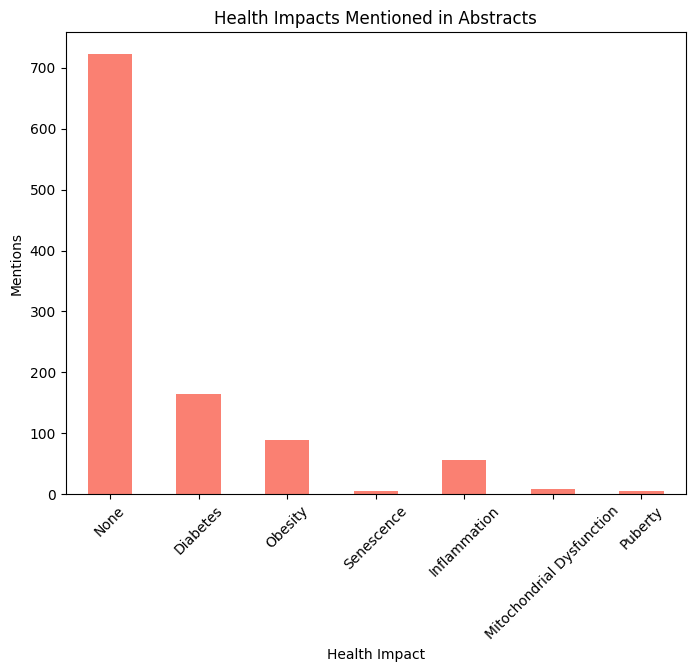

In [ ]:
#extracting health impacts
def extract_health_impacts(text):
    impacts = []
    text = text.lower()
    if 'diabetes' in text:
        impacts.append('Diabetes')
    if 'obesity' in text:
        impacts.append('Obesity')
    if any(x in text for x in ['cancer', 'carcinogenic']):
        impacts.append('Cancer')
    if 'cardiovascular' in text:
        impacts.append('Cardiovascular')
    if 'senescence' in text:
        impacts.append('Senescence')
    if 'inflammation' in text:
        impacts.append('Inflammation')
    if 'mitochondrial dysfunction' in text:
        impacts.append('Mitochondrial Dysfunction')
    if 'puberty' in text:
        impacts.append('Puberty')
    return impacts if impacts else ['None']

data['Extracted_Health_Impacts'] = data['Health_Impacts'].apply(extract_health_impacts)
health_impact_counts = Counter()
for impacts in data['Extracted_Health_Impacts']:
    for impact in impacts:
        health_impact_counts[impact] += 1

plt.figure(figsize=(8, 6))
pd.Series(health_impact_counts).plot(kind='bar', color='salmon')
plt.title('Health Impacts Mentioned in Abstracts')
plt.xlabel('Health Impact')
plt.ylabel('Mentions')
plt.xticks(rotation=45)
plt.show()

**Health Impact Distribution by Addictive Category**

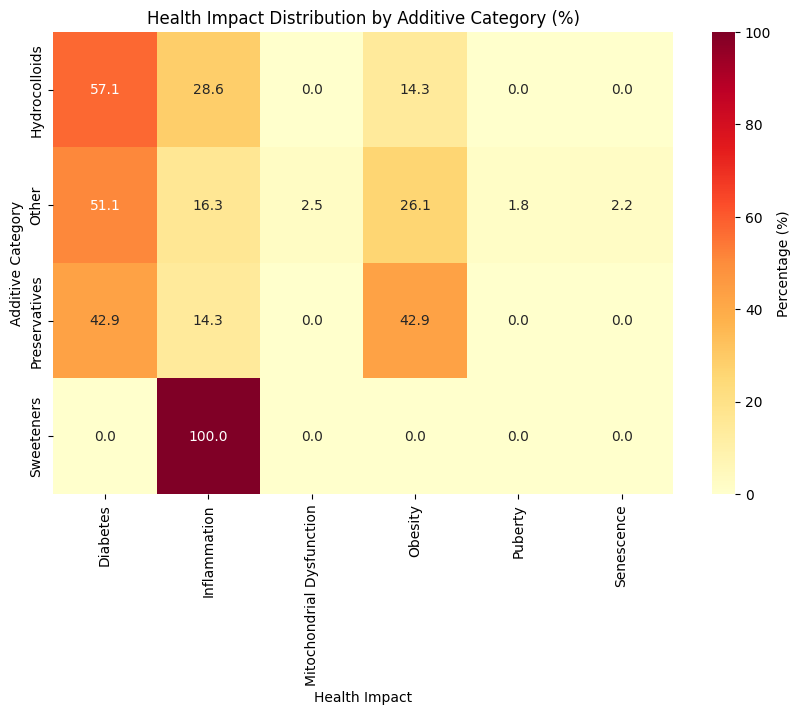

In [ ]:
#filtering out none addictive category
data_filtered = data[data['Additive_Category'] != 'None'].copy()
#creating a cross-tabulation of additive categories and health impacts
health_impact_counts = []
for _, row in data_filtered.iterrows():
    for impact in row['Extracted_Health_Impacts']:
        health_impact_counts.append({
            'Additive_Category': row['Additive_Category'],
            'Health_Impact': impact
        })

impact_df = pd.DataFrame(health_impact_counts)

#excluding none health impact
impact_df = impact_df[impact_df['Health_Impact'] != 'None']

#creating a pivot table for visualization
pivot_table = impact_df.pivot_table(
    index='Additive_Category',
    columns='Health_Impact',
    aggfunc='size',
    fill_value=0
)

#calculating total counts per additive category
pivot_table['Total'] = pivot_table.sum(axis=1)

#normalizing to percentages (proportion of each health impact per additive category)
pivot_table_normalized = pivot_table.div(pivot_table['Total'], axis=0) * 100
pivot_table_normalized = pivot_table_normalized.drop(columns='Total')

#visualizing the relationship with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_normalized, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Percentage (%)'})
plt.title('Health Impact Distribution by Additive Category (%)')
plt.xlabel('Health Impact')
plt.ylabel('Additive Category')
plt.show()

This heatmap shows the percentage distribution of various health impacts associated with different food additive categories. Key observations include:

* **Sweeteners** are directly linked to **inflammation** (100%), indicating a strong association in the data.
* **Hydrocolloids** are most commonly associated with **diabetes (57.1%)** and **inflammation (28.6%)**.
* **Preservatives** are evenly associated with **diabetes (42.9%)** and **obesity (42.9%)**, suggesting a dual concern.
* The **Other** category shows a broader spread, with notable associations with **diabetes (51.1%)**, **obesity (26.1%)**, and minor links to other impacts like **mitochondrial dysfunction**, **puberty**, and **senescence**.

Overall, inflammation and diabetes are the most frequent health concerns across categories.

**Sentiment Summary by Addictive**

In [ ]:
#sentiment Analysis by Additive
sentiment_summary = data_filtered.groupby('Additive_Category').agg({
    'Sentiment_Score': ['mean', 'count']
}).reset_index()
sentiment_summary.columns = ['Additive_Category', 'Avg_Sentiment_Score', 'Count']

In [ ]:
sentiment_summary

,Additive_Category,Avg_Sentiment_Score,Count
0,Hydrocolloids,0.734144,32
1,Other,0.286350,744
2,Preservatives,0.456353,38
3,Sweeteners,0.816700,3




The sentiment analysis shows how positively or negatively each additive category is discussed in the PubMed articles:

* **Sweeteners** have the highest average sentiment score (0.82)
* **Hydrocolloids** also show a strong positive sentiment (0.73), suggesting they are generally viewed favorably, likely due to their functional benefits in food.
* **Preservatives** have a moderate sentiment score (0.46), reflecting a mix of concern and usefulness.
* **Other** additives, despite being the most studied group, have the lowest average sentiment (0.29), possibly because this category includes a wide range of substances, some of which may be viewed negatively.

Overall, the results suggest that while sweeteners and hydrocolloids are discussed positively, there's more caution or criticism around the broader "Other" category.
